# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv("/content/100000 Sales Records.csv")

# 10 first columns

In [ ]:
data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
5,Europe,Denmark,Clothes,Online,C,2/20/2013,473105037,2/28/2013,1149,109.28,35.84,125562.72,41180.16,84382.56
6,Europe,Germany,Cosmetics,Offline,M,3/31/2013,754046475,5/3/2013,7964,437.20,263.33,3481860.80,2097160.12,1384700.68
7,Middle East and North Africa,Turkey,Fruits,Online,C,3/26/2012,772153747,4/7/2012,6307,9.33,6.92,58844.31,43644.44,15199.87
8,Europe,United Kingdom,Snacks,Online,H,12/29/2012,847788178,1/15/2013,8217,152.58,97.44,1253749.86,800664.48,453085.38
9,Asia,Kazakhstan,Cosmetics,Online,H,9/11/2015,471623599,9/18/2015,2758,437.20,263.33,1205797.60,726264.14,479533.46


# 1.Data Understanding and Cleaning


## Data info and describe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [ ]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,5.503956e+08,5001.446170,266.703989,188.019711,1.336067e+06,9.419755e+05,3.940912e+05
std,2.593219e+08,2884.575424,216.940081,175.706023,1.471768e+06,1.151828e+06,3.795986e+05
min,1.000089e+08,1.000000,9.330000,6.920000,1.866000e+01,1.384000e+01,4.820000e+00
25%,3.260464e+08,2505.000000,109.280000,56.670000,2.797533e+05,1.629283e+05,9.590000e+04
50%,5.477185e+08,5007.000000,205.700000,117.110000,7.898916e+05,4.679374e+05,2.836575e+05
75%,7.750785e+08,7495.250000,437.200000,364.690000,1.836490e+06,1.209475e+06,5.683841e+05
max,9.999965e+08,10000.000000,668.270000,524.960000,6.682700e+06,5.249075e+06,1.738700e+06


## Key variables in the dataset

In [ ]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

## Check for missing value and outlier

### Missing Value

In [ ]:
print("Missing value in each column: ")
data.isnull().sum()

Missing value in each column: 


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Outlier

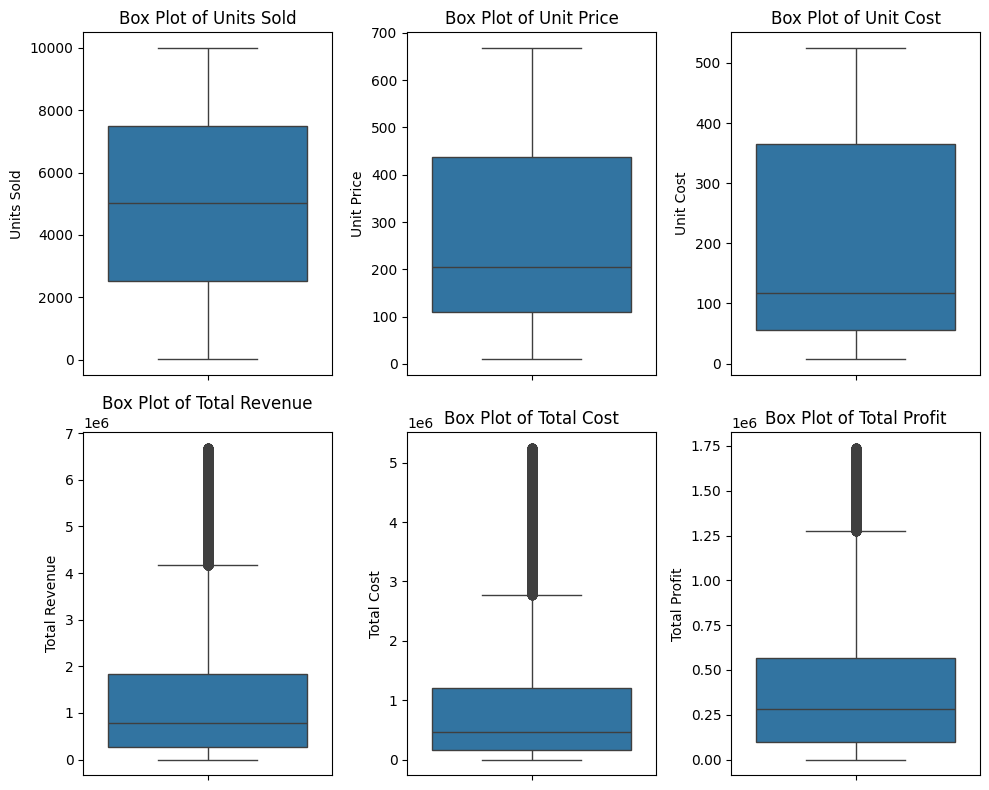

In [ ]:
# Plotting box plots for numerical columns to check for outliers
numerical_features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
def replace_outliers_with_median(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])  #check if 1 of 2 true --> total true
    return data

columns_to_check = ['Units Sold', 'Total Revenue', 'Total Profit']
for col in columns_to_check:
    data = replace_outliers_with_median(data, col)

In [ ]:
_columns = ['Units Sold', 'Total Revenue', 'Total Profit']
fig = make_subplots(rows=1, cols=len(_columns))

for i, _col in enumerate(_columns, start=1):
    y0 = data[_col].values
    fig.add_trace(go.Box(y=y0, name=_col), row=1, col=i)
fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1500, title_text="Outliers")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 2.Exploratory Data Analysis (EDA)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns].nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date        2766
Ship Date         2813
dtype: int64

## Selecting features and target


In [ ]:
target = 'Total Revenue'
features = data.drop(columns = 'Total Revenue')

## General Analysis

Review **Total Revenue** by different groups such as **Item Type**, **Sales Channel**, **Region**, **Country**.

Total Revenue by Item Type

In [ ]:
total_item_type = data.groupby('Item Type')[['Total Revenue']].sum().reset_index()
top_item = total_item_type.sort_values(by='Total Revenue', ascending=False).head(10)

<ipython-input-14-a87f96e03e36>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




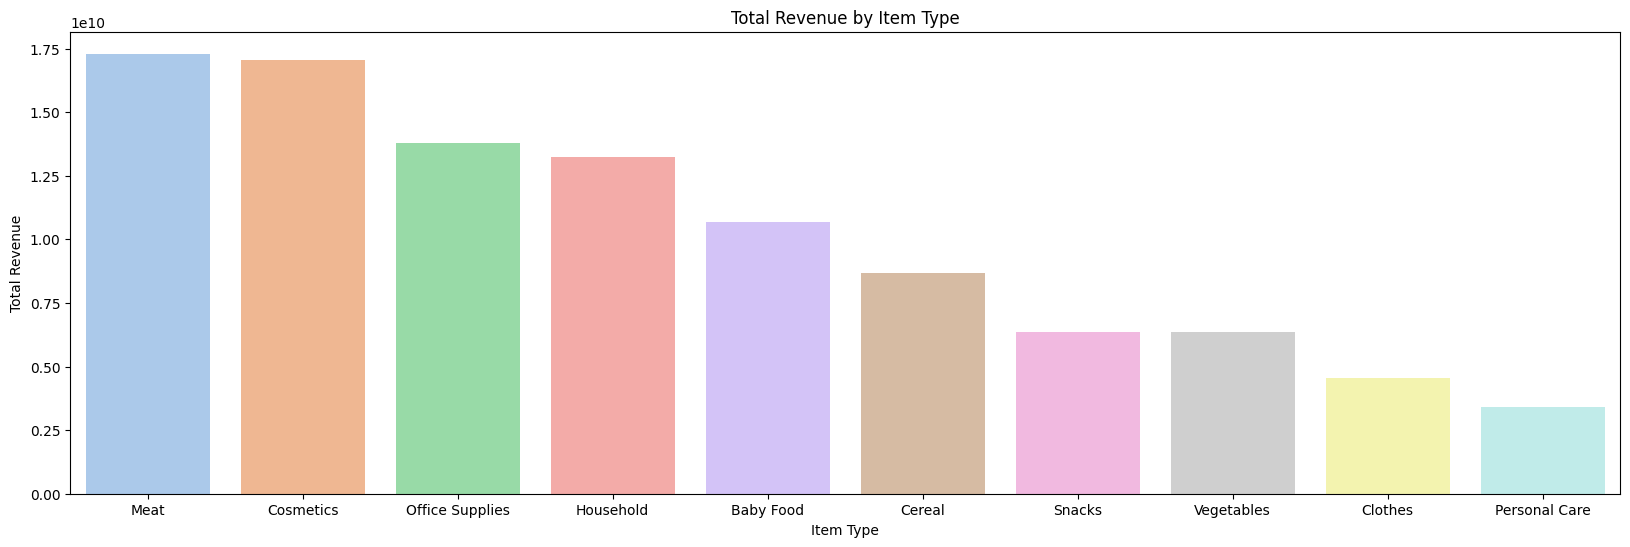

In [ ]:
#visualize
plt.figure(figsize = (20,6))
sns.barplot(x='Item Type', y='Total Revenue', data=top_item, palette='pastel')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

Top 3 products with the highest cost

In [ ]:
cost_items = data.groupby('Item Type')[['Unit Cost']].sum().reset_index()
top_3_cost_items = cost_items.sort_values(by='Unit Cost', ascending=False).head(3)
top_3_cost_items

,Item Type,Unit Cost
8,Office Supplies,4423312.96
6,Household,4160026.12
7,Meat,3034220.80


<ipython-input-16-68363d34b81d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




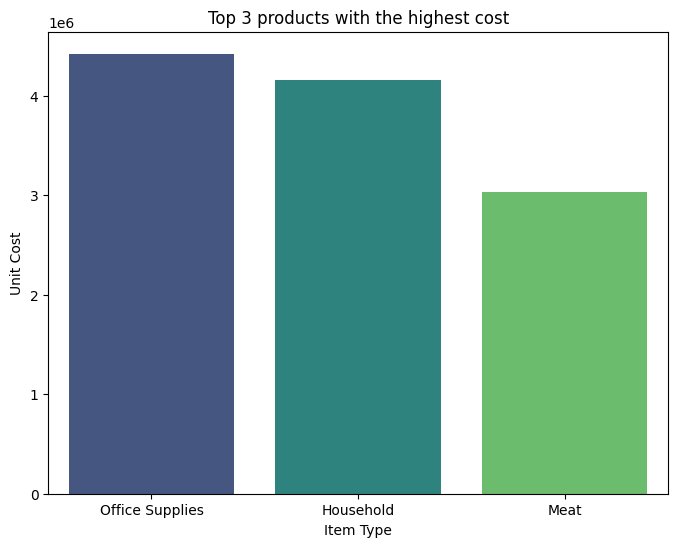

In [ ]:
#visualize
plt.figure(figsize = (8,6))
sns.barplot(x='Item Type', y='Unit Cost', data=top_3_cost_items, palette='viridis')
plt.title('Top 3 products with the highest cost')
plt.xlabel('Item Type')
plt.ylabel('Unit Cost')
plt.show()

### **By Region**

Top 3 regions with the most revenue

In [ ]:
total_region = data.groupby('Region')[['Total Revenue']].sum().reset_index()
top_3_region = total_region.sort_values(by='Total Revenue', ascending=False).head(3)
top_3_region

,Region,Total Revenue
6,Sub-Saharan Africa,2.706707e+10
3,Europe,2.677696e+10
0,Asia,1.510026e+10


<ipython-input-18-3a79f0c421d5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




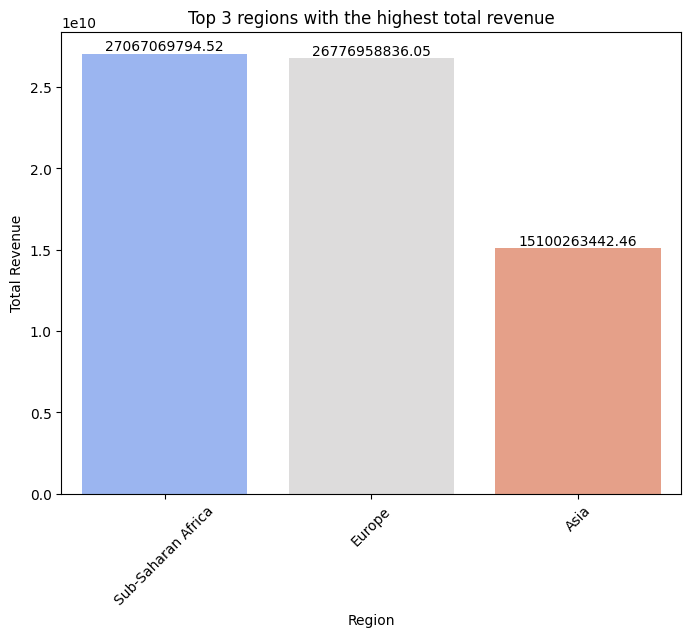

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=top_3_region, x='Region', y='Total Revenue', palette='coolwarm', ax=ax)
ax.set_title('Top 3 regions with the highest total revenue')
ax.set_xlabel('Region')
ax.set_ylabel('Total Revenue')
ax.tick_params(axis='x', rotation=45)

# Add values on top of each bar for Total Revenue
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

### Item Type by Region

Top 5 most sold items in top 3 Regions

In [ ]:
top_3_region_names = top_3_region['Region'].tolist()
top_3_region_data = data[data['Region'].isin(top_3_region_names)]
top_3_items = top_3_region_data.groupby(['Region', 'Item Type'])[['Units Sold']].sum().reset_index()

# Sắp xếp và chọn ra Top 5 sản phẩm được bán nhiều nhất cho mỗi khu vực
top_5_items_per_region = top_3_items.groupby('Region').apply(lambda x: x.sort_values(by='Units Sold', ascending=False).head()).reset_index(drop=True)
top_5_items_per_region


,Region,Item Type,Units Sold
0,Asia,Cereal,6397658.0
1,Asia,Snacks,6330265.0
2,Asia,Office Supplies,6187421.0
3,Asia,Vegetables,6121703.0
4,Asia,Clothes,6117405.0
5,Europe,Cereal,11076271.0
6,Europe,Office Supplies,10905284.0
7,Europe,Vegetables,10859623.0
8,Europe,Beverages,10782748.0
9,Europe,Fruits,10773210.0


In [ ]:
top_5_items_per_region['Item Type'].tolist()

['Cereal',
 'Snacks',
 'Office Supplies',
 'Vegetables',
 'Clothes',
 'Cereal',
 'Office Supplies',
 'Vegetables',
 'Beverages',
 'Fruits',
 'Cosmetics',
 'Baby Food',
 'Beverages',
 'Office Supplies',
 'Household']

<ipython-input-21-2fe492d88526>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-2fe492d88526>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-2fe492d88526>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-2fe492d88526>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-2fe492d88526>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-2fe492d88526>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



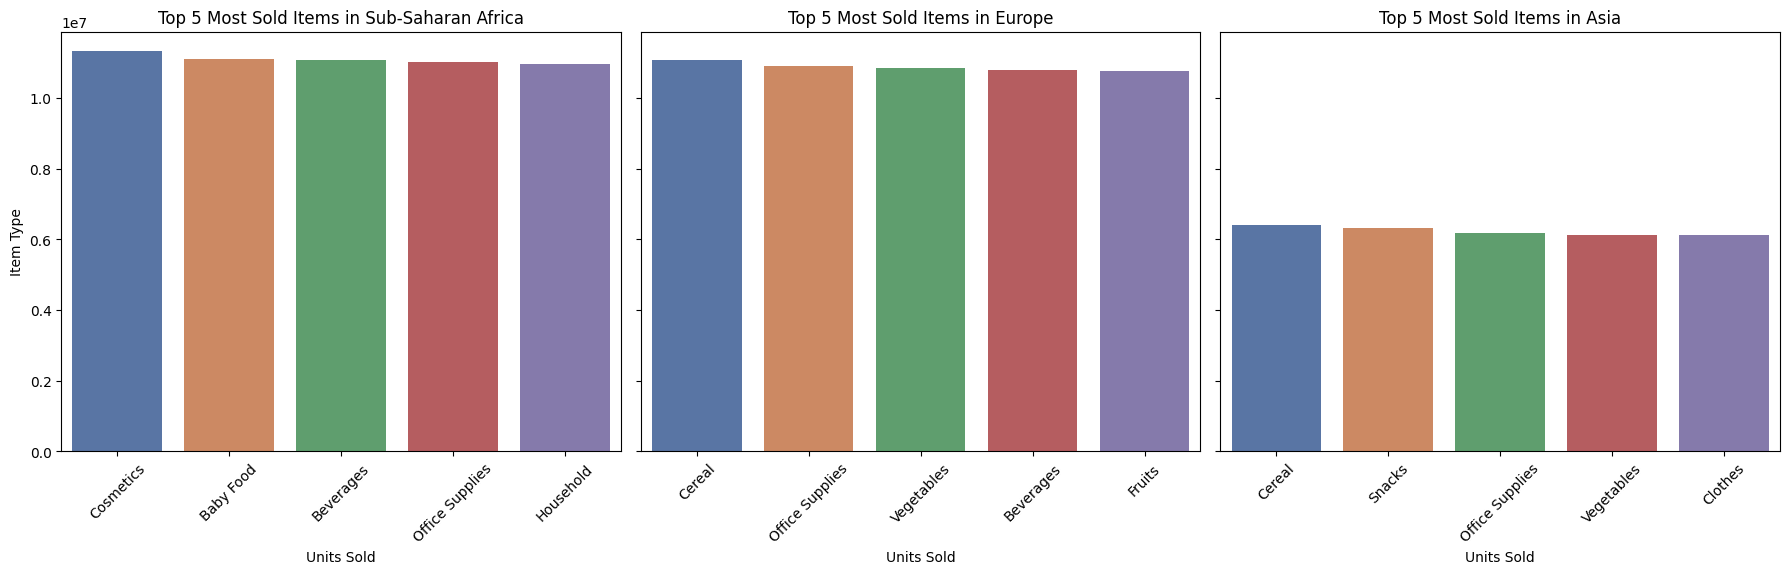

In [ ]:
#visualize
fig, axs = plt.subplots(1, len(top_3_region_names), figsize=(18, 6), sharey=True)

for ax, region in zip(axs, top_3_region_names):
    region_data = top_5_items_per_region[top_5_items_per_region['Region'] == region]
    sns.barplot(x='Item Type', y='Units Sold', data=region_data, palette='deep', ax=ax)
    ax.set_title(f'Top 5 Most Sold Items in {region}')
    ax.set_xlabel('Units Sold')
    ax.set_ylabel('Item Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Top 3 most profitable products

In [ ]:
top_5_items_profit = top_3_region_data.groupby(['Region', 'Item Type'])[['Total Profit']].sum().reset_index()
top_5_items_per_region = pd.merge(top_5_items_per_region, top_5_items_profit, on=['Region', 'Item Type'])
top_3_profit_items_per_region = top_5_items_per_region.groupby('Region').apply(lambda x: x.sort_values(by='Total Profit', ascending=False).head(3)).reset_index(drop=True)
top_3_profit_items_per_region

,Region,Item Type,Units Sold,Total Profit
0,Asia,Office Supplies,6187421.0,7.811619e+08
1,Asia,Cereal,6397658.0,5.667685e+08
2,Asia,Clothes,6117405.0,4.492622e+08
3,Europe,Office Supplies,10905284.0,1.376792e+09
4,Europe,Cereal,11076271.0,9.812468e+08
5,Europe,Vegetables,10859623.0,6.855680e+08
6,Sub-Saharan Africa,Office Supplies,11022827.0,1.391632e+09
7,Sub-Saharan Africa,Cosmetics,11318369.0,1.250012e+09
8,Sub-Saharan Africa,Household,10967644.0,1.234708e+09


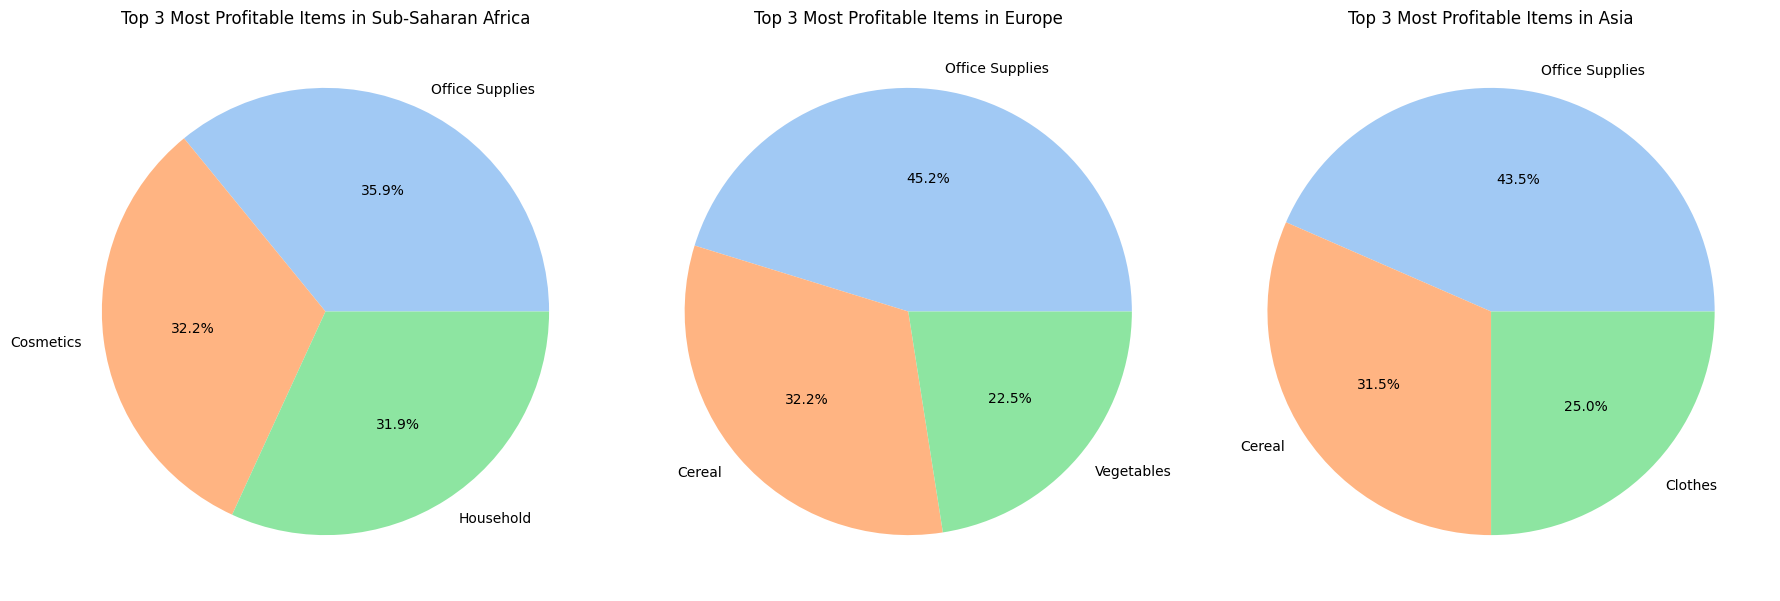

In [ ]:
num_regions = len(top_3_region_names)
fig, axs = plt.subplots(1, num_regions, figsize=(18, 6))

# Plot pie charts for each region
for ax, region in zip(axs, top_3_region_names):
    region_data = top_3_profit_items_per_region[top_3_profit_items_per_region['Region'] == region]
    ax.pie(region_data['Total Profit'], labels=region_data['Item Type'], autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=len(region_data)))
    ax.set_title(f'Top 3 Most Profitable Items in {region}')

# Adjust layout
plt.tight_layout()
plt.show()

### By Country

Top 3 Countries with the most revenue

In [ ]:
total_country = data.groupby('Country')[['Total Revenue']].sum().reset_index()
top_3_countries = total_country.sort_values(by='Total Revenue', ascending=False).head(3)
top_3_countries

,Country,Total Revenue
155,Sudan,6.566203e+08
24,Cambodia,6.428532e+08
66,Hungary,6.325171e+08


<ipython-input-25-2d6d208ed923>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




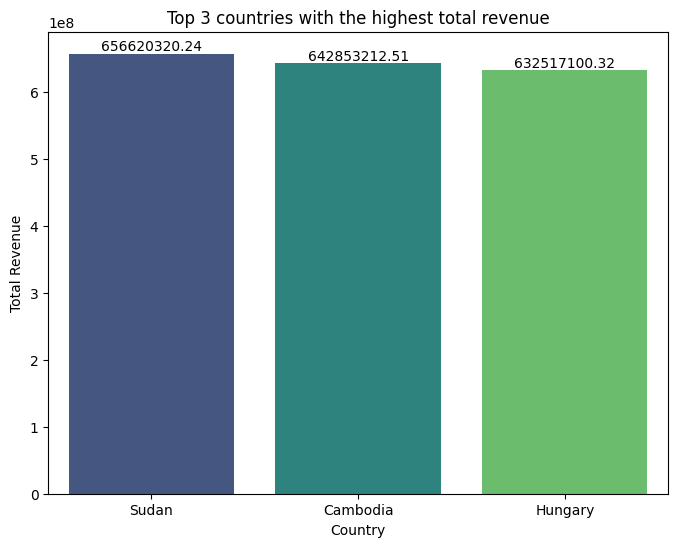

In [ ]:
#visualize
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data = top_3_countries, x = 'Country', y = 'Total Revenue', palette = 'viridis', ax = ax)
ax.set_title('Top 3 countries with the highest total revenue')
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue')

# Add values on top of each bar for Total Revenue
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

### Item type by Country

Top 5 most sold items in top 3 countries

In [ ]:
top_3_countries_names = top_3_countries['Country'].tolist()
top_3_countries_data = data[data['Country'].isin(top_3_countries_names)]
top_3_items = top_3_countries_data.groupby(['Country', 'Item Type'])[['Units Sold']].sum().reset_index()

top_5_items_per_country = top_3_items.groupby('Country').apply(lambda x: x.sort_values(by='Units Sold', ascending=False).head()).reset_index(drop=True)
top_5_items_per_country

,Country,Item Type,Units Sold
0,Cambodia,Meat,301028.0
1,Cambodia,Cereal,293759.0
2,Cambodia,Beverages,268159.0
3,Cambodia,Vegetables,265004.0
4,Cambodia,Household,263389.0
5,Hungary,Snacks,314714.0
6,Hungary,Household,296185.0
7,Hungary,Office Supplies,289081.0
8,Hungary,Cosmetics,277868.0
9,Hungary,Meat,245938.0


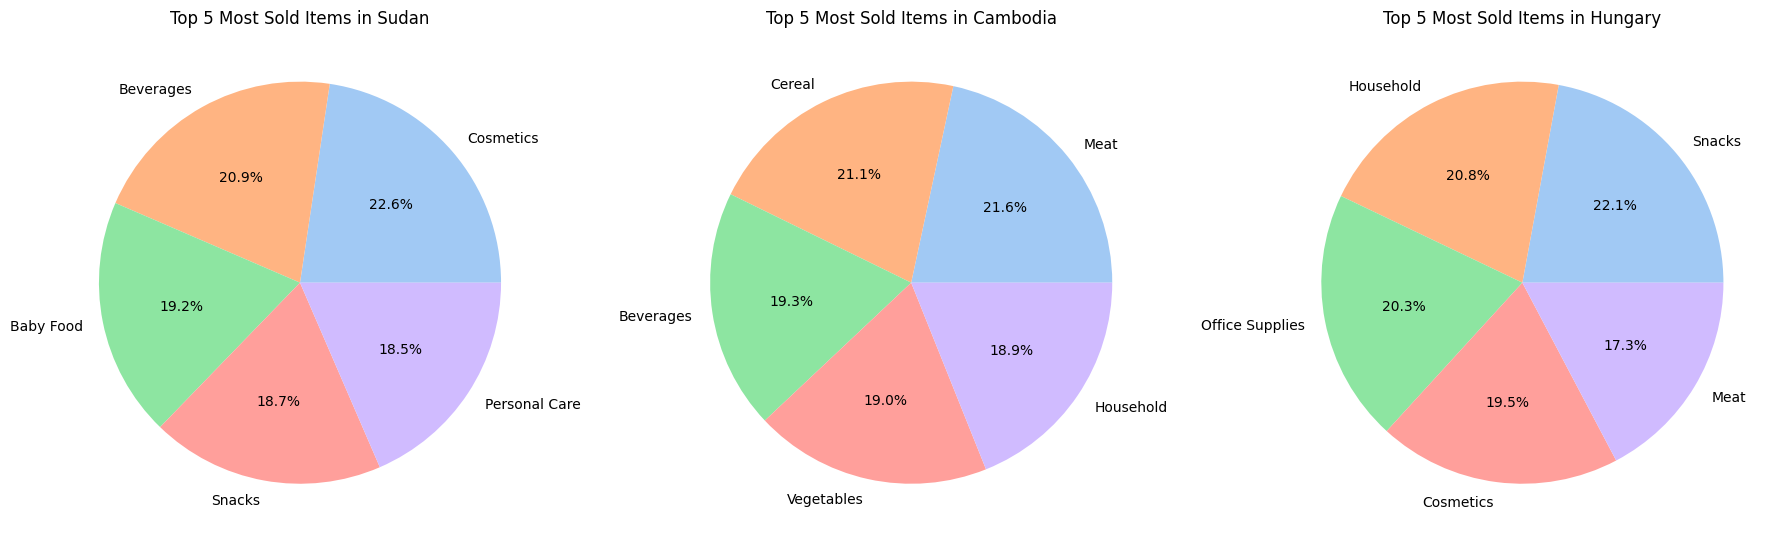

In [ ]:
num_countries = len(top_3_countries_names)
fig, axs = plt.subplots(1, num_countries, figsize=(18, 6), sharey=True)
for ax, country in zip(axs, top_3_countries_names):
    country_data = top_5_items_per_country[top_5_items_per_country['Country'] == country]
    ax.pie(country_data['Units Sold'], labels=country_data['Item Type'], autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=len(country_data)))
    ax.set_title(f'Top 5 Most Sold Items in {country}')
plt.tight_layout()
plt.show()

Top 3 items of each countries in Sales Channel

In [ ]:
top_5_items_sales_channel = top_3_countries_data.groupby(['Country', 'Item Type', 'Sales Channel'])[['Units Sold']].sum().reset_index()
top_5_items_sales_channel

,Country,Item Type,Sales Channel,Units Sold
0,Cambodia,Baby Food,Offline,122128.0
1,Cambodia,Baby Food,Online,104199.0
2,Cambodia,Beverages,Offline,124345.0
3,Cambodia,Beverages,Online,143814.0
4,Cambodia,Cereal,Offline,122240.0
...,...,...,...,...
67,Sudan,Personal Care,Online,138014.0
68,Sudan,Snacks,Offline,127810.0
69,Sudan,Snacks,Online,161714.0
70,Sudan,Vegetables,Offline,118346.0


In [ ]:
# Tính tổng số lượng bán ra theo loại sản phẩm và kênh bán hàng cho mỗi quốc gia
top_3_items_sales_channel = top_3_countries_data.groupby(['Country', 'Item Type', 'Sales Channel'])[['Units Sold']].sum().reset_index()

# Tính tổng số lượng bán ra theo loại sản phẩm cho mỗi quốc gia
top_3_items = top_3_countries_data.groupby(['Country', 'Item Type'])[['Units Sold']].sum().reset_index()

# Hợp nhất dữ liệu tổng số lượng bán ra với dữ liệu kênh bán hàng
combined_data = pd.merge(top_3_items, top_3_items_sales_channel, on=['Country', 'Item Type'], suffixes=('', '_Channel'))

# Sắp xếp và chọn ra top 5 sản phẩm được bán nhiều nhất cho mỗi quốc gia
top_5_items_per_country = combined_data.groupby('Country').apply(lambda x: x.sort_values(by='Units Sold', ascending=False).head(5)).reset_index(drop=True)
top_5_items_per_country

,Country,Item Type,Units Sold,Sales Channel,Units Sold_Channel
0,Cambodia,Meat,301028.0,Online,137062.0
1,Cambodia,Meat,301028.0,Offline,163966.0
2,Cambodia,Cereal,293759.0,Offline,122240.0
3,Cambodia,Cereal,293759.0,Online,171519.0
4,Cambodia,Beverages,268159.0,Offline,124345.0
5,Hungary,Snacks,314714.0,Online,153149.0
6,Hungary,Snacks,314714.0,Offline,161565.0
7,Hungary,Household,296185.0,Offline,176119.0
8,Hungary,Household,296185.0,Online,120066.0
9,Hungary,Office Supplies,289081.0,Online,159968.0


<ipython-input-30-79809f251e15>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-30-79809f251e15>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-30-79809f251e15>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



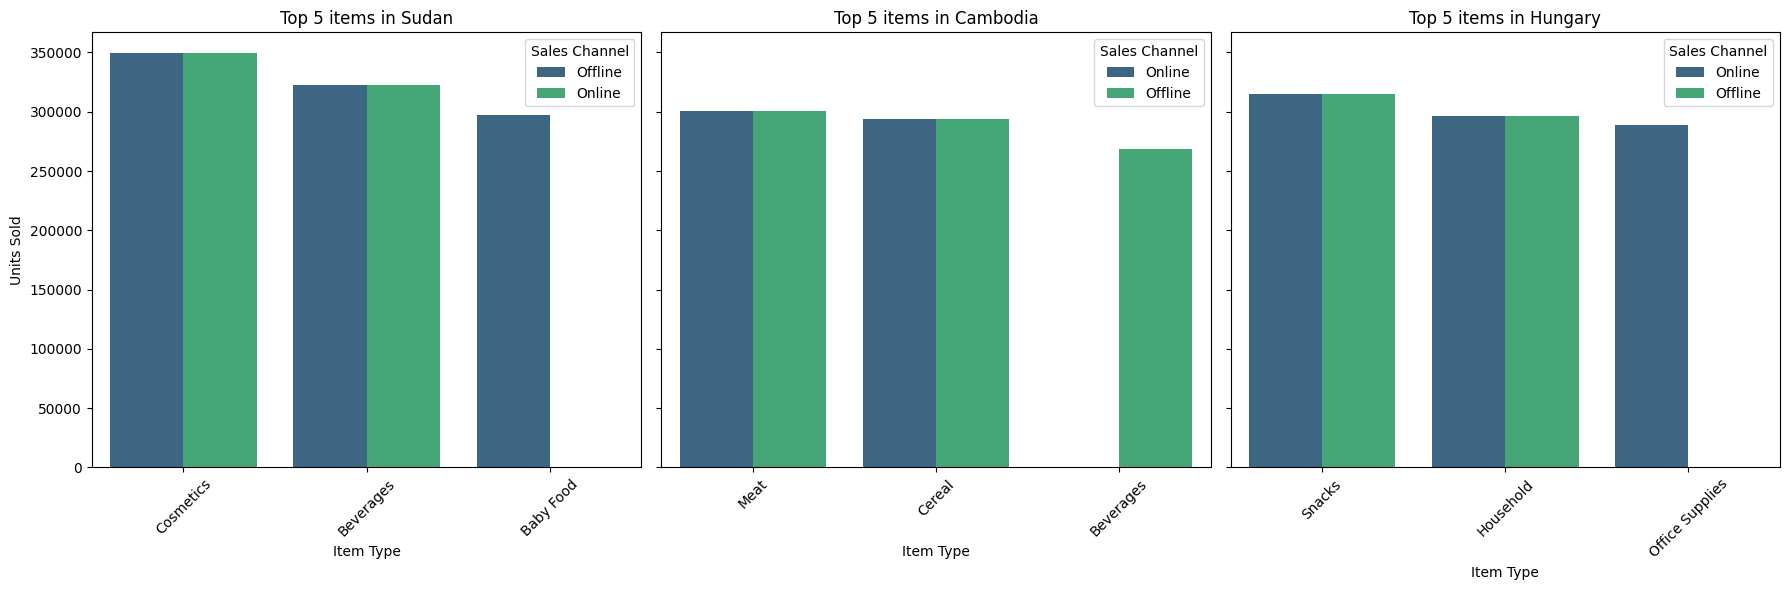

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Lặp qua từng quốc gia và vẽ biểu đồ
for ax, country in zip(axs, top_3_countries_names):
    country_data = top_5_items_per_country[top_5_items_per_country['Country'] == country]
    sns.barplot(data=country_data, x='Item Type', y='Units Sold', hue='Sales Channel', palette='viridis', ax=ax)
    ax.set_title(f'Top 5 items in {country}')
    ax.set_xlabel('Item Type')
    ax.set_ylabel('Units Sold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Sales Channel')

plt.tight_layout()
plt.show()

Top 3 most profitable Items in top 5 most sold Items of top 3 countries

In [ ]:
top_5_items_profit_country = top_3_countries_data.groupby(['Country', 'Item Type'])[['Total Profit']].sum().reset_index()
top_5_items_per_country = pd.merge(top_5_items_per_country, top_5_items_profit_country, on=['Country', 'Item Type'])
top_3_profit_items_per_country = top_5_items_per_country.groupby('Country').apply(lambda x: x.sort_values(by='Total Profit', ascending=False).head(3)).reset_index(drop=True)
top_3_profit_items_per_country

,Country,Item Type,Units Sold,Sales Channel,Units Sold_Channel,Total Profit
0,Cambodia,Cereal,293759.0,Offline,122240.0,26024109.81
1,Cambodia,Cereal,293759.0,Online,171519.0,26024109.81
2,Cambodia,Meat,301028.0,Online,137062.0,17218801.60
3,Hungary,Office Supplies,289081.0,Online,159968.0,36496476.25
4,Hungary,Household,296185.0,Offline,176119.0,28847060.54
5,Hungary,Household,296185.0,Online,120066.0,28847060.54
6,Sudan,Cosmetics,349506.0,Offline,131226.0,39677547.98
7,Sudan,Cosmetics,349506.0,Online,218280.0,39677547.98
8,Sudan,Baby Food,297023.0,Offline,152393.0,28472624.78


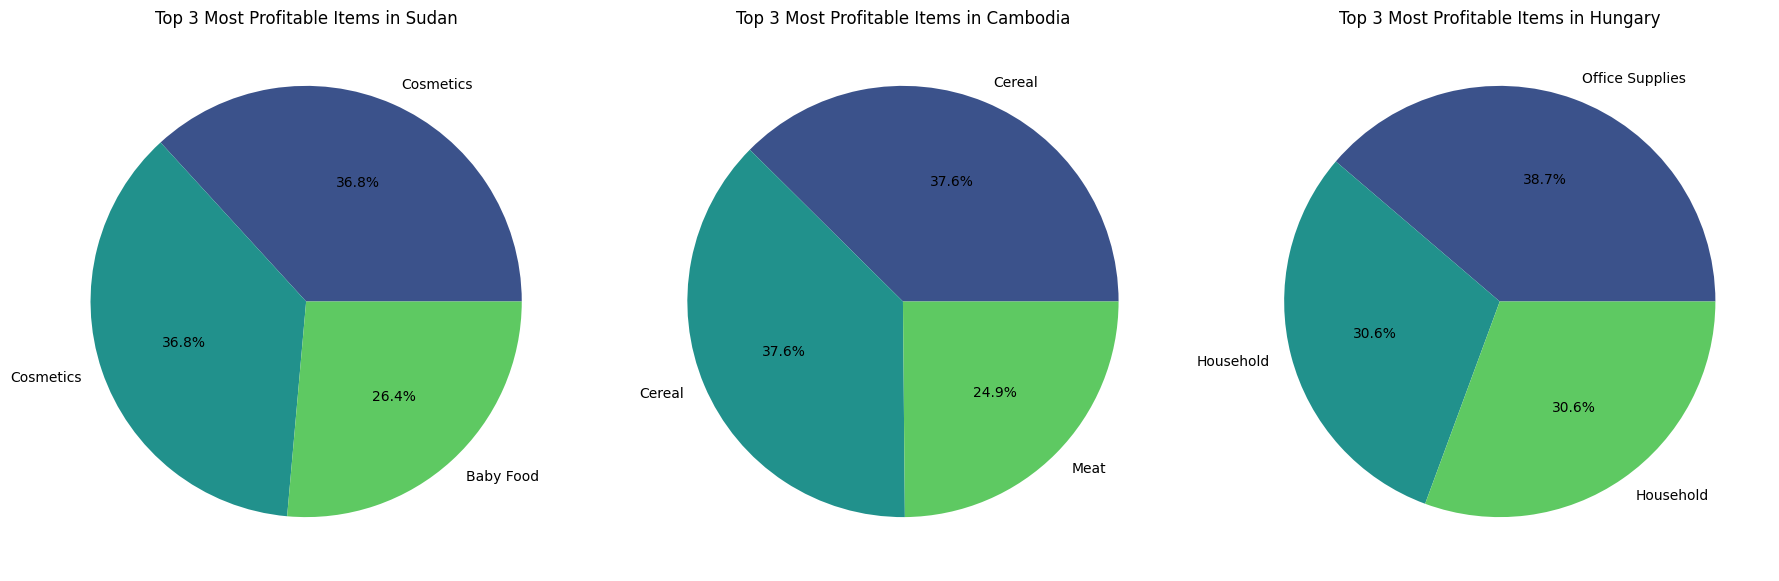

In [ ]:
fig, axs = plt.subplots(1, len(top_3_countries_names), figsize=(18, 6))
for ax, country in zip(axs, top_3_countries_names):
    country_data = top_3_profit_items_per_country[top_3_profit_items_per_country['Country'] == country]
    ax.pie(country_data['Total Profit'], labels=country_data['Item Type'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(country_data)))
    ax.set_title(f'Top 3 Most Profitable Items in {country}')
plt.tight_layout()
plt.show()

## Analysis Over Time

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['Order Date'] = pd.to_datetime(data_copy['Order Date'])
data_copy['Month'] = data_copy['Order Date'].dt.to_period('M')
data_copy['Year'] = data_copy['Order Date'].dt.year

### Total revenue by month

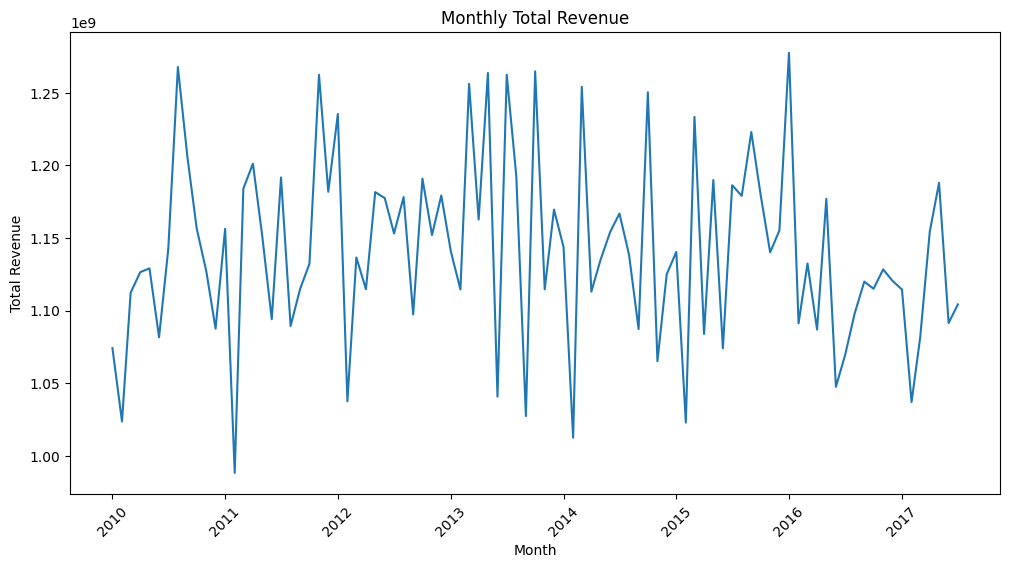

In [ ]:
monthly_revenue = data_copy.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Revenue', data=monthly_revenue)
plt.xticks(rotation=45)
plt.title('Monthly Total Revenue')
plt.show()

### Total revenue by years

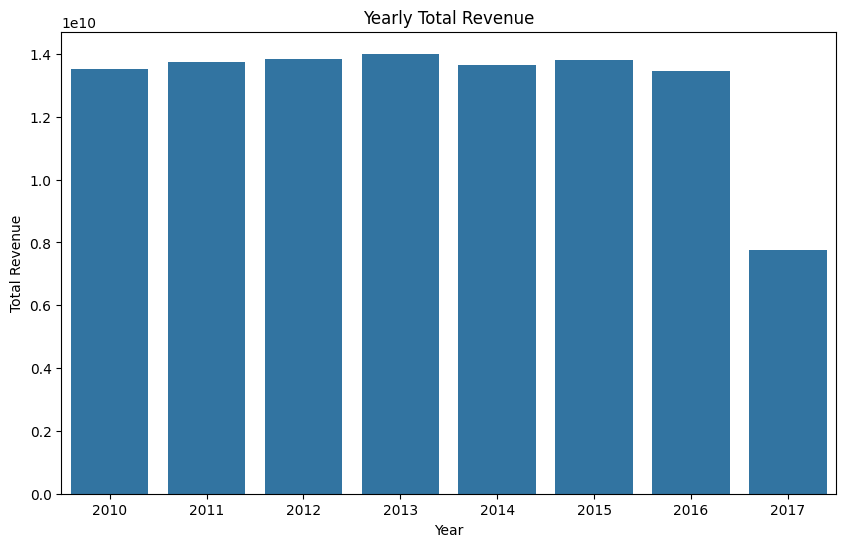

In [ ]:
yearly_revenue = data_copy.groupby('Year')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Revenue', data=yearly_revenue)
plt.title('Yearly Total Revenue')
plt.show()

## Relationship Analysis

### Total revenue and Units sold

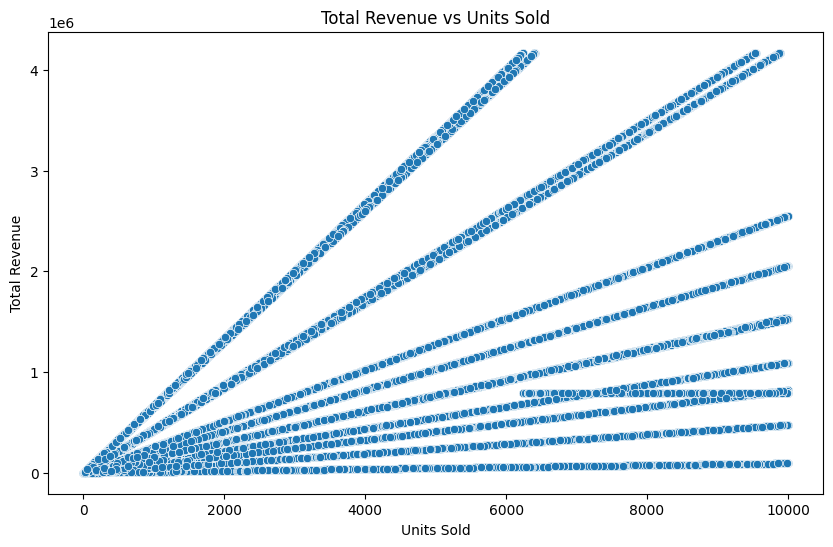

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=data)
plt.title('Total Revenue vs Units Sold')
plt.show()

### Total revenue and Unit price

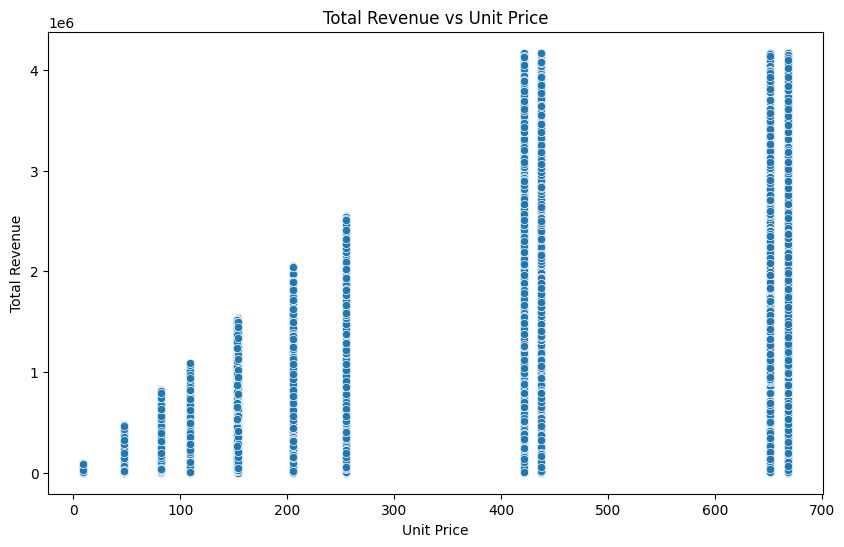

In [ ]:
# Mối quan hệ giữa doanh thu và giá đơn vị
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=data)
plt.title('Total Revenue vs Unit Price')
plt.show()

### Total revenue and Unit cost

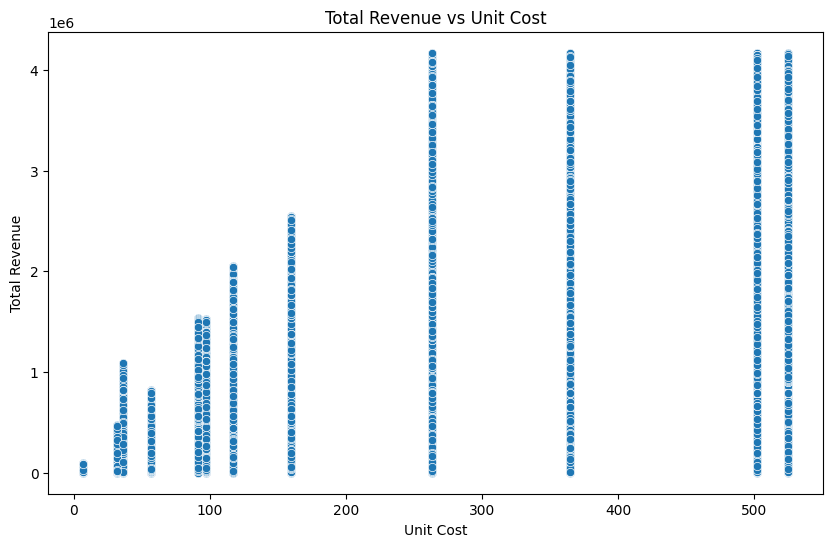

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit Cost', y='Total Revenue', data=data)
plt.title('Total Revenue vs Unit Cost')
plt.show()

## Correlation

In [ ]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Optionally, convert dates to numerical features (e.g., days since a reference date)
data['Order Date Numeric'] = (data['Order Date'] - data['Order Date'].min()).dt.days
data['Ship Date Numeric'] = (data['Ship Date'] - data['Ship Date'].min()).dt.days

# Remove the original date columns
data = data.drop(columns=['Order Date', 'Ship Date'])

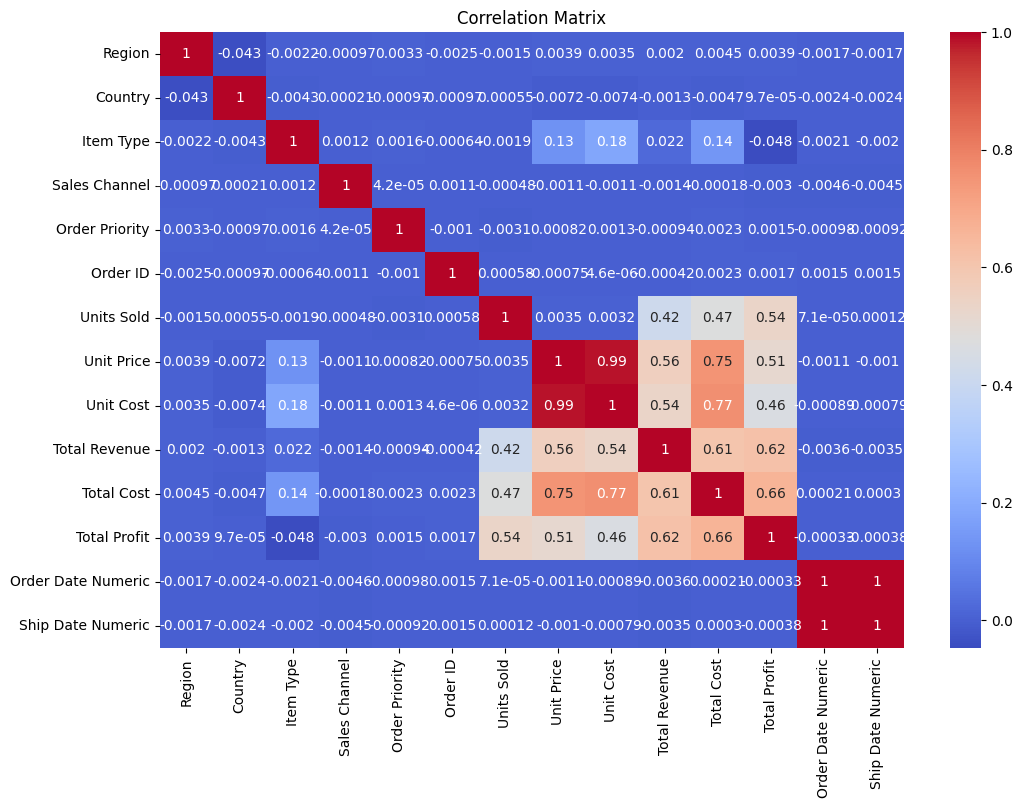

Top 15 features most correlated with Total Revenue:
Total Profit          0.619120
Total Cost            0.606003
Unit Price            0.558765
Unit Cost             0.536562
Units Sold            0.417211
Item Type             0.022088
Order Date Numeric    0.003590
Ship Date Numeric     0.003541
Region                0.001994
Sales Channel         0.001433
Country               0.001288
Order Priority        0.000941
Order ID              0.000416
Name: Total Revenue, dtype: float64


In [ ]:
# Encode categorical columns
label_encoders = {}
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print the top 10 features most correlated with Total Revenue
top_15_features = correlation_matrix['Total Revenue'].abs().sort_values(ascending=False).head(16)  # including Total Revenue itself
print("Top 15 features most correlated with Total Revenue:")
print(top_15_features[1:])

### Select the most relevant variables

In [ ]:
relevant_columns = ['Total Revenue', 'Total Profit', 'Total Cost', 'Unit Price', 'Unit Cost', 'Units Sold']

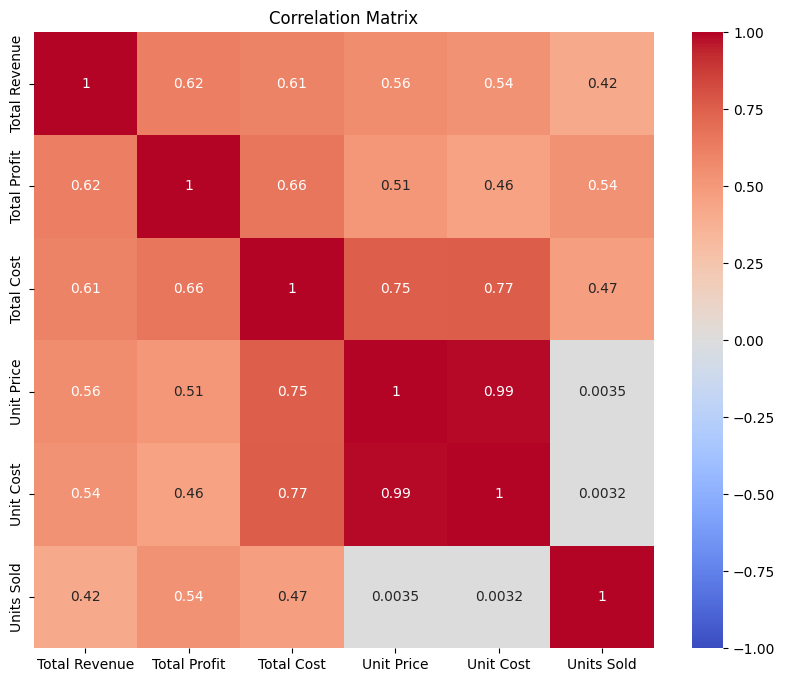

In [ ]:
correlation_matrix = data[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.drop(columns = ['Item Type', 'Order Date Numeric','Ship Date Numeric', 'Region','Sales Channel', 'Country',
          'Order Priority','Order ID'], inplace = True, axis = 1)
data.columns

Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

# 3.Model Selection

In [ ]:
#Select columns to apply one-hot encoding
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

#Apply one-hot-encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
X = data_encoded.drop(columns=['Total Revenue'])
y = data_encoded['Total Revenue']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data_encoded.dtypes

Order ID              int64
Units Sold          float64
Unit Price          float64
Unit Cost           float64
Total Revenue       float64
                     ...   
Item Type_11           bool
Sales Channel_1        bool
Order Priority_1       bool
Order Priority_2       bool
Order Priority_3       bool
Length: 214, dtype: object

In [ ]:
float_columns = data_encoded.select_dtypes(include=['float64']).columns
float_columns

Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

## Linear Regression

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Prediction on the train test and test set
y_pred_test = model_linear.predict(X_test)
y_pred_train = model_linear.predict(X_train)

In [ ]:
# Model evaluation
mse_train_linear = mean_squared_error(y_train, y_pred_train)
mse_test_linear = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Train Test: ",mse_train_linear)
print("Mean Squared Error on Test Test: ",mse_test_linear)

r2_train_linear = r2_score(y_train, y_pred_train)
r2_test_linear = r2_score(y_test, y_pred_test)
print("R2 Score on Train Test: ",r2_train_linear)
print("R2 Score on Test Test: ",r2_test_linear)


Mean Squared Error on Train Test:  387217286036.6656
Mean Squared Error on Test Test:  389280401672.3241
R2 Score on Train Test:  0.6205310199339249
R2 Score on Test Test:  0.619932805666598


In [ ]:
# Khởi tạo pipeline với scaler và mô hình LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Định nghĩa tham số tìm kiếm
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'model__positive': [True, False]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình với dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Tìm kiếm tham số tốt nhất
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Dự đoán trên tập huấn luyện và kiểm tra với mô hình tốt nhất
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Đánh giá mô hình
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error on Train Test: ", mse_train)
print("Mean Squared Error on Test Test: ", mse_test)
print("R2 Score on Train Test: ", r2_train)
print("R2 Score on Test Test: ", r2_test)

# Độ chính xác
print("Accuracy on Train Set: ", grid_search.best_estimator_.score(X_train, y_train))
print("Accuracy on Test Set: ", grid_search.best_estimator_.score(X_test, y_test))

Best Parameters:  {'model__copy_X': True, 'model__fit_intercept': True, 'model__positive': False}
Mean Squared Error on Train Test:  387220927167.44336
Mean Squared Error on Test Test:  389297969686.3736
R2 Score on Train Test:  0.6205274516630022
R2 Score on Test Test:  0.6199156534396142
Accuracy on Train Set:  0.6205274516630022
Accuracy on Test Set:  0.6199156534396142


## Random Forest

In [ ]:
model_random = RandomForestRegressor(n_estimators=100, random_state=42)
model_random.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Prediction on the train test and test set
y_pred_test = model_random.predict(X_test)
y_pred_train = model_random.predict(X_train)

In [ ]:
# Model evaluation
mse_train_random = mean_squared_error(y_train, y_pred_train)
mse_test_random = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Train Test: ",mse_train_random)
print("Mean Squared Error on Test Test: ",mse_test_random)

r2_train_random = r2_score(y_train, y_pred_train)
r2_test_random = r2_score(y_test, y_pred_test)
print("R2 Score on Train Test: ",r2_train_random)
print("R2 Score on Test Test: ",r2_test_random)

Mean Squared Error on Train Test:  30538245.644214753
Mean Squared Error on Test Test:  49414090.02834867
R2 Score on Train Test:  0.9999700728315974
R2 Score on Test Test:  0.9999517554069588


In [ ]:
# Acurracy
print("Accuracy on Train Set: ", model_random.score(X_train, y_train))
print("Accuracy on Test Set: ", model_random.score(X_test, y_test))

Accuracy on Train Set:  0.9999700728315974
Accuracy on Test Set:  0.9999517554069588


## Desicion Trees

In [ ]:
model_trees = DecisionTreeRegressor()
model_trees.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Prediction on the train test and test set
y_pred_test = model_trees.predict(X_test)
y_pred_train = model_trees.predict(X_train)

In [ ]:
# Model evaluation
mse_train_trees = mean_squared_error(y_train, y_pred_train)
mse_test_trees = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Train Test: ",mse_train_trees)
print("Mean Squared Error on Test Test: ",mse_test_trees)

r2_train_trees = r2_score(y_train, y_pred_train)
r2_test_trees = r2_score(y_test, y_pred_test)
print("R2 Score on Train Test: ",r2_train_trees)
print("R2 Score on Test Test: ",r2_test_trees)

Mean Squared Error on Train Test:  8.721407745174678e-17
Mean Squared Error on Test Test:  488708.4432066126
R2 Score on Train Test:  1.0
R2 Score on Test Test:  0.9999995228579552


In [ ]:
# Acurracy
print("Accuracy on Train Set: ", model_trees.score(X_train, y_train))
print("Accuracy on Test Set: ", model_trees.score(X_test, y_test))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.9999995228579552


# Overal

In [ ]:
data = pd.read_csv("/content/100000 Sales Records.csv")

# Chuẩn bị dữ liệu
data.drop(columns=['Item Type', 'Region', 'Sales Channel', 'Country',
                          'Order Priority', 'Order ID'], axis=1, inplace=True)

data.head()

,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,10/8/2014,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,2/22/2015,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,12/9/2015,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,9/17/2014,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,2/4/2010,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

# Đọc dữ liệu
data = pd.read_csv("/content/100000 Sales Records.csv")
data.drop(columns = ['Ship Date', 'Order Date'], axis=1, inplace=True)

# Các cột phân loại và số
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
numeric_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit', 'Total Revenue']

# ColumnTransformer cho mã hóa one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
        ('num', 'passthrough', numeric_columns)
    ]
)

# Tạo pipeline tiền xử lý
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

# Tiền xử lý dữ liệu
data_preprocessed = preprocessing_pipeline.fit_transform(data)

# Tách dữ liệu thành X và y
X = pd.DataFrame(data_preprocessed, columns=[*preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns), *numeric_columns])
y = X.pop('Total Revenue')

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Đánh giá
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Train Set: ", mse_train)
print("Mean Squared Error on Test Set: ", mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R2 Score on Train Set: ", r2_train)
print("R2 Score on Test Set: ", r2_test)

Mean Squared Error on Train Set:  3.6790510450562403e-31
Mean Squared Error on Test Set:  3.7799721928376483e-31
R2 Score on Train Set:  1.0
R2 Score on Test Set:  1.0
